# SMAC/CRISTAL/ULille

Auteur : Philippe Mathieu, CRISTAL Lab, SMAC Team, University of Lille, email : philippe.mathieu@univ-lille.fr

Date : 13 march 2020

## Simulation of epidemics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from covid import *

In [2]:
couleur_a='#396AB1'
couleur_b='#DA7C30'
dpi=300
figsize = (10,5)

# Un modèle S-I-(G/R)-M

Les infectés se répartissent en Graves et Remis (somme de ces deux taux sensiblement équivalent aux remis de l'ancien modèle). Les Graves finissent soit Remis (taux) soit Morts (1-taux).

In [3]:
data_nat = collecte_donnees()
#data_reg = collecte_donnees('regional')
#data_dep = collecte_donnees('departemental')

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


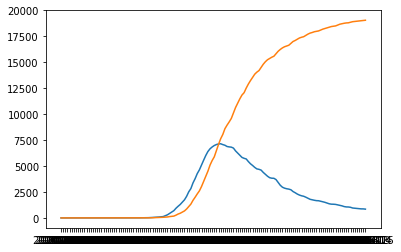

In [4]:
plt.plot(data_nat['reanimation'])
plt.plot(data_nat['deces'])

In [5]:
data_nat.tail()

,cas_confirmes,deces,deces_ehpad,reanimation,hospitalises,gueris
date,,,,,,
2020-06-11,155561.0,18962.0,10384.0,903.0,11465.0,72149.0
2020-06-12,156287.0,18990.0,10384.0,879.0,11124.0,72572.0
2020-06-13,156813.0,19014.0,10384.0,871.0,10909.0,72808.0
2020-06-14,157220.0,19023.0,10384.0,869.0,10881.0,72859.0
2020-06-15,157372.0,19052.0,10384.0,846.0,10752.0,73044.0


## Evaluation nationale

In [12]:
avant_confinement = data_nat.loc[:'2020-03-16'].shape[0]
renforcement = data_nat.loc[:'2020-03-24'].shape[0]
prolongement = data_nat.loc[:'2020-04-13'].shape[0]
deconfinement = data_nat.loc[:'2020-05-11'].shape[0]
aujourdhui = len(data_nat.index) - 1

In [13]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, len(data_nat.index) - prolongement-1]

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

L'optimisation peut être lancée à l'aide de la commande suivante:

In [ ]:
#solution = optimisation_genetique(500, 1000, data_objectif, periodes_confinement, eval_SIGRM, nb_parametres=2)

Comparaison graphique :

In [ ]:
#compare_solution_SIGRM(solution, data_objectif, periodes_confinement)

## Solutions intéressantes

In [ ]:
def scenario(listeTaux, category="G", label=None, linestyle='solid', color=couleur_b):
    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1
    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    SIGRM_increment(S, I, G, R, M, listeTaux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    if category == "G":
        plt.plot(np.array(G)*67000000, label=label, color=color, linestyle=linestyle)
    if category == "M":
        plt.plot(np.array(M)*67000000, label=label, color=color, linestyle=linestyle)

### Proposition du 06/05

In [ ]:
periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement]

In [ ]:
candidat=[0.275372335146436, 0.38676389057705435, 0.08906800372536995, 0.10045712354211243, 
          data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]
taux_intermediaire = (candidat[0] + candidat[3])/2

Evolution du R0 :

In [ ]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

In [ ]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [ ]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(np.array(G)*67000000, label="Modèle (intermédiaire)", color=couleur_a, linestyle=':')
plt.plot(data_objectif[2]*67000000, label="Données réelles", color=couleur_a)
plt.plot(np.array(M)*67000000, label="Modèle (intermédiaire)", color=couleur_b, linestyle=':')
plt.plot(data_objectif[4]*67000000, label="Données réelles", color=couleur_b)

# Après confinement
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "G", 
         color=couleur_a, linestyle=':')
scenario([taux_intermediaire]*(aujourdhui - deconfinement+14), "M", color=couleur_b, linestyle=':')

plt.xticks([0, avant_confinement, prolongement, data_nat.loc[:'2020-05-05'].shape[0], deconfinement], 
           ('24/01', '17/03\nConfinement', '13/04\nProlongement', '05/05', '11/05'), rotation=0)

plt.title("Estimation du nombre de lits en réa et du nombre de décès")
plt.legend()
plt.grid()

In [ ]:
(R[-1] + I[-1] + G[-1] + M[-1]) *100

## Modele Papier

In [123]:
def graphique(candidat, output=False, infectes=False):

    tauxInfecteInitial = candidat[-5] 
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]

    S=[1 - tauxInfecteInitial]
    I=[tauxInfecteInitial]
    G=[0.0]
    R=[0.0]
    M=[0.0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]] * periode
        i += 1

    SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

    fig, ax = plt.subplots(figsize=(12,7))

    plt.plot(np.array(G)*67000000, label="Réanimation (modèle)", color=couleur_a, linestyle=':')
    plt.plot(data_objectif[2]*67000000, label="Réanimation (données réelles)", color=couleur_a)
    plt.plot(np.array(M)*67000000, label="Décès (modèle)", color=couleur_b, linestyle=':')
    plt.plot(data_objectif[4]*67000000, label="Décès (données réelles)", color=couleur_b)
    
    if infectes:
        plt.plot((1-np.array(S))*67000000, label="Infectés (modèle)", color='gray', linestyle=':')
        plt.plot(data_objectif[1]*67000000, label="Infectés (données réelles)", color='gray')

    plt.xticks([0, avant_confinement, confinement, deconfinement], 
               ('24/01', '09/03\nPre-conf.', '24/03\nConfinement', '11/05\nDeconfinement'), rotation=0)

    plt.title("Modélisation du nombre de lits en réanimation et du nombre de décès")
    plt.legend()
    plt.grid()
    if output:
        plt.savefig('dss/figures/' + output + '.jpg', dpi=300)
        table = "R0 avant & "+ str(np.round(candidat[0] / (candidat[5] + candidat[6]),2)) +"\\\\ \nR0 pré-confinement & "+ str(np.round(candidat[1] / (candidat[5] + candidat[6]),2)) +" \\\\ \nR0 confinement & "+ str(np.round(candidat[2] / (candidat[5] + candidat[6]),2)) +"\\\\ \nR0 déconfinement & "+ str(np.round(candidat[3] / (candidat[5] + candidat[6]),2)) +"\\\\ \nInfectés initiaux & "+ str(candidat[4] * 67000000) +"\\\\ \nTaux réanimation & "+ str(np.round(candidat[5],3)) +"\\\\ \nTaux remis & "+ str(np.round(candidat[6],3)) +"\\\\ \nTaux réanimation vers grave & "+ str(np.round(candidat[7],3)) +"\\\\ \nTaux réanimation vers décès & "+ str(np.round(candidat[8],3)) +"\\\\ \n"
        f=open('dss/figures/' + output + '.tex',"w")
        f.write(table)
        f.close()
    #print("Infectés")
    #print(R[-1] + I[-1] + G[-1] + M[-1])
return None

In [124]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

In [125]:
avant_confinement = data_nat.loc[:'2020-03-09'].shape[0]
confinement = data_nat.loc[:'2020-03-24'].shape[0]
prolongement = data_nat.loc[:'2020-04-13'].shape[0]
deconfinement = data_nat.loc[:'2020-05-11'].shape[0]
aujourdhui = len(data_nat.index) - 1

In [126]:
periodes_confinement = [avant_confinement, confinement - avant_confinement, deconfinement - confinement, aujourdhui - deconfinement]

### Meilleur modèle

In [127]:
candidat = [0.186, 0.364, 0.055, 0.08, 
            200/67000000, 0.005, 0.1, 0.025, 0.064]

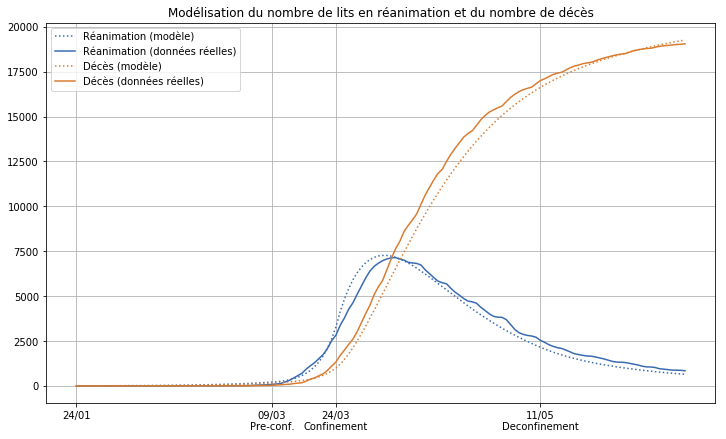

In [128]:
graphique(candidat, 'meilleur')

R0:

In [129]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.7714285714285714
3.4666666666666663
0.5238095238095237
0.7619047619047619


### En cas de progression des medecins

In [130]:
candidat = [0.205, 0.29, 0.067, 0.08, 
            200/67000000, 0.005, 0.1, 0.025, 0.07]

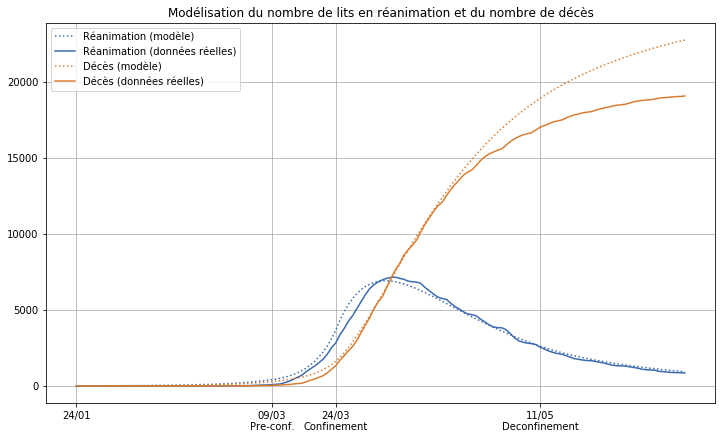

In [131]:
graphique(candidat, 'medecins')

In [132]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.952380952380952
2.7619047619047614
0.638095238095238
0.7619047619047619


### En cas d'absence de fixation d'infos clés du COVID : le temps de contagiosité

In [90]:
candidat = [0.9391601604347165, 0.903989286517725, 0.8884825972411234, 1.05, 
            200/67000000, 0.001, 0.7814541473043769, 0.005695732722921513, 0.061721988387863365]

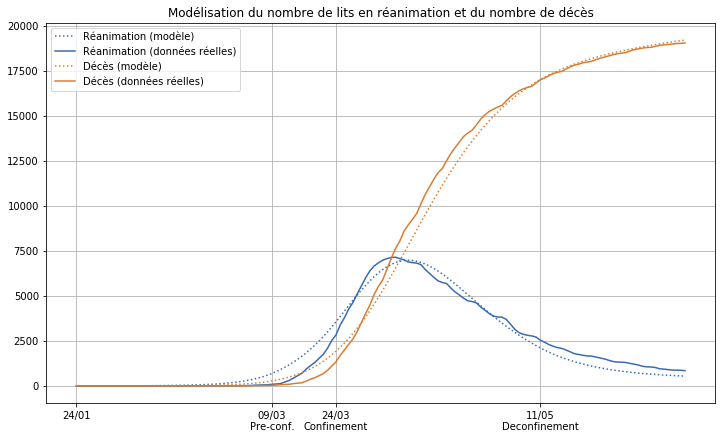

In [91]:
graphique(candidat, 'faux')

# Donnees départementales CHU Lille

In [133]:
data = pd.read_csv('chu_dep.csv')

# Obtenir les périodes de confinement
avant_confinement = data.loc[:67].shape[0]
confinement = data.loc[:82].shape[0]
prolongement = data.loc[:102].shape[0]
deconfinement = data.loc[:130].shape[0]

# Optimisation
population = 4050756

I=np.array(data['reanimation']/population)
R=np.array([0] * len(data.index))
G=np.array(data['reanimation']/population)
M=np.array((data['deces_cum'])/population)

S=[1]*len(data.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

periodes_confinement = [avant_confinement, confinement - avant_confinement, deconfinement - confinement, len(data.index) - deconfinement-1]

In [134]:
candidat = [0.19, 0.4, 0.05045809903888343, 7.353010721559755e-05, 
            2.4686749831389497e-07, 0.005, 0.1, 0.048013246957940243, 0.089]

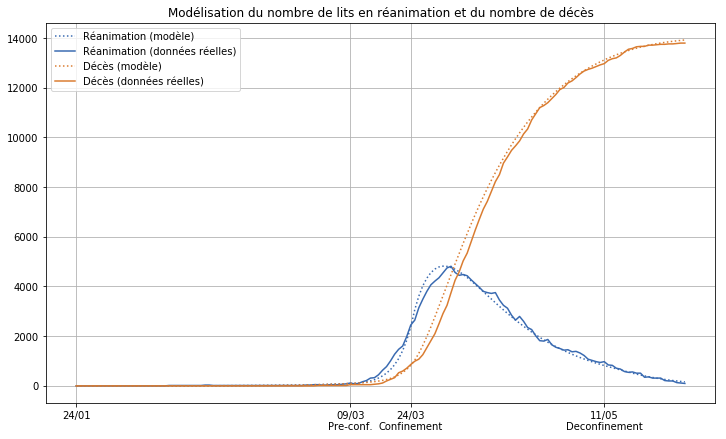

In [135]:
graphique(candidat)

In [136]:
print(candidat[0] / (candidat[5] + candidat[6]))
print(candidat[1] / (candidat[5] + candidat[6]))
print(candidat[2] / (candidat[5] + candidat[6]))
print(candidat[3] / (candidat[5] + candidat[6]))

1.8095238095238093
3.8095238095238093
0.48055332417984215
0.0007002867353866432


# Matrices d'âge

In [ ]:
def SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_tauxTransmiss, tauxRemis, tauxGraves, 
              tauxRemisGraves, tauxMortalite):

    for tauxTransmiss in liste_tauxTransmiss:

        nouveauxCas = tauxTransmiss*S[-1]*matrice.dot(I[-1]/population_vector)
        nouveauxInfectesRemis=tauxRemis*I[-1]
        nouveauxInfectesGraves=tauxGraves*I[-1]
        nouveauxGravesRemis=tauxRemisGraves*G[-1]
        nouveauxGravesMorts=tauxMortalite*G[-1]
        
        S = np.append(S, [S[-1]-nouveauxCas], axis=0) 
        I = np.append(I, [I[-1]+nouveauxCas-nouveauxInfectesRemis-nouveauxInfectesGraves], axis=0)
        G = np.append(G, [G[-1]+nouveauxInfectesGraves-nouveauxGravesMorts-nouveauxGravesRemis], axis=0)
        R = np.append(R, [R[-1]+nouveauxInfectesRemis+nouveauxGravesRemis], axis=0)
        M = np.append(M, [M[-1]+nouveauxGravesMorts], axis=0)
        #assert(round(S[-1]+I[-1]+G[-1]+R[-1]+M[-1],3) == 1) # la somme fait toujours 1
        
    return S, I, G, R, M

In [ ]:
tauxInfecteInitial = np.array([0.001, 0.001])
tauxGraves = 0.05
tauxRemis = 0.1
tauxRemisGraves = 0.05
tauxMortalite = 0.05

matrice = np.array([[18, 9], [3, 12]])

repartition = np.array([0.25, 0.75])

population = 20000

population_vector = np.array([0.25, 0.75]) * population


S=[(1 - tauxInfecteInitial) * population_vector]
I=[tauxInfecteInitial * population_vector]
G=[tauxInfecteInitial*0]
R=[tauxInfecteInitial*0]
M=[tauxInfecteInitial*0]

liste_taux = [0.02]*200

In [ ]:
S

In [ ]:
S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice*0.5, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

In [ ]:
plt.plot(I)

In [ ]:
plt.plot(M)

In [ ]:
plt.plot(M[:,0] + M[:,1])

In [ ]:
plt.plot(R)

## Optimisation

In [ ]:
def eval_SIGRM_age(candidat, data_objectif, periodes_confinement, population=1, plot=False):
    candidat = np.absolute(candidat)
    tauxInfecteInitial = candidat[-5]
    tauxGraves = candidat[-4]
    tauxRemis = candidat[-3]
    tauxRemisGraves = candidat[-2]
    tauxMortalite = candidat[-1]
    
    # Paramètres fixes
    tauxRemis = 0.08
    tauxGraves = 0.07
    tauxInfecteInitial = 400/67000000
    
    repartition = np.array([0.25, 0.75])
    matrice = np.array([repartition, repartition])
    population_vector = np.array([0.25, 0.75])

    tauxInfecteInitial = np.array([tauxInfecteInitial, tauxInfecteInitial])
    S=[(1 - tauxInfecteInitial) * population_vector]
    I=[tauxInfecteInitial * population_vector]
    G=[tauxInfecteInitial*0]
    R=[tauxInfecteInitial*0]
    M=[tauxInfecteInitial*0]

    liste_taux = []
    i = 0
    for periode in periodes_confinement:
        liste_taux = liste_taux + [candidat[i]/20] * periode
        i += 1

    S, I, G, R, M = SIGRM_age(S, I, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)
    
    if plot:
        fig, ax = plt.subplots(figsize=(12,7))
        plt.plot(data_objectif[2]*67000000, label="Graves (données)")
        plt.plot(np.array(G[:,0] + G[:,1])*67000000, label="Graves (estimation")
        plt.plot(data_objectif[4]*67000000, label="Morts (données)")
        plt.plot(np.array(M[:,0] + M[:,1])*67000000, label="Morts (estimation)")
        plt.legend()
        plt.savefig(str(plot) +".jpg")

    return np.linalg.norm(np.array([G[:,0] + G[:,1],M[:,0] + M[:,1]] ) - np.array([data_objectif[2],data_objectif[4]]) ),

In [ ]:
I=np.array(data_nat['cas_confirmes']/67000000)
R=np.array(data_nat['gueris']/67000000)
G=np.array(data_nat['reanimation']/67000000)
M=np.array((data_nat['deces'])/67000000)
#M=np.array((data['deces'] + data['deces_ehpad'])/67000000)

S=[1]*len(data_nat.index) - I - G - R - M

data_objectif = np.array([S, I, G, R, M])

tauxInfecteInitial = 20 * data_nat['cas_confirmes'][0]/67000000 # Ici on peut modifier pour s'écarter du chiffre officiel initial

periodes_confinement = [avant_confinement, renforcement - avant_confinement, prolongement - renforcement, deconfinement - prolongement, aujourdhui - deconfinement]

In [ ]:
matrice

In [ ]:
candidat = optimisation_genetique(1000, 200, data_objectif, periodes_confinement, eval_SIGRM_age, nb_parametres=len(periodes_confinement)+5, verbose=True)

In [ ]:
candidat

In [ ]:
eval_SIGRM_age(candidat, data_objectif, periodes_confinement, plot='temp.jpg')

In [ ]:
eval_SIGRM(candidat, data_objectif, periodes_confinement, plot='temp.jpg')

## Verification

In [ ]:
periodes_confinement = [60]

In [ ]:
candidat=[0.8, data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]

In [ ]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

S=[1 - tauxInfecteInitial]
I=[tauxInfecteInitial]
G=[0.0]
R=[0.0]
M=[0.0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [ ]:
SIGRM_increment(S, I, G, R, M, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

In [ ]:
plt.plot(I)

In [ ]:
candidat=[0.8/20.5, data_nat['cas_confirmes'][0]/67000000, 0.07, 0.07, 0.011445165643347396, 0.06942900452349375]

In [ ]:
tauxInfecteInitial = candidat[-5] 
tauxGraves = candidat[-4]
tauxRemis = candidat[-3]
tauxRemisGraves = candidat[-2]
tauxMortalite = candidat[-1]

population_vector = np.array([0.25, 0.75])

In [ ]:
tauxInfecteInitial = np.array([tauxInfecteInitial, tauxInfecteInitial])
S=[(1 - tauxInfecteInitial) * population_vector]
I2=[tauxInfecteInitial * population_vector]
G=[tauxInfecteInitial*0]
R=[tauxInfecteInitial*0]
M=[tauxInfecteInitial*0]

liste_taux = []
i = 0
for periode in periodes_confinement:
    liste_taux = liste_taux + [candidat[i]] * periode
    i += 1

In [ ]:
S, I2, G, R, M = SIGRM_age(S, I2, G, R, M, matrice, population_vector, liste_taux, tauxRemis, tauxGraves, tauxRemisGraves, tauxMortalite)

In [ ]:
plt.plot(I)
plt.plot(I2[:,0] + I2[:,1])
plt.plot(I2[:,0])
plt.plot(I2[:,1])